In [455]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [456]:
#2
f = lambda x:2*x #ODE 1 derivative of function we are searching for
func0 = 48

def ftrig(t,psi): #ODE 2
    numerator = 1-psi*np.sin(t)
    denominator = np.cos(t)
    return numerator/denominator

def f_ode3(t,psi): #ODE 3
    return 9.8 - 0.196*psi

sig = lambda x:1/(1 + np.exp(-x)) #activation function 
dsig = lambda x:(np.exp(-x))/(1+np.exp(-x))**2 #activation function derivative 

def ReLU(x): #second activation function 
    return x * (x > 0)

def dReLU(x):#second activation function derivative 
    return 1. * (x > 0)

<h><b>The neural network is the similar to the following (one layer perceptron):</b></h>
<div>
    <img src = "https://miro.medium.com/max/3446/1*-IPQlOd46dlsutIbUq1Zcw.png" width = 25%>
</div>

In [457]:
#3
def N(w0,w1,b0,b1,t): #neural network
    return np.dot(ReLU(np.dot(w0,t)+b0),w1) + b1

In [458]:
#4
def dN(w0,w1,b0,b1,t): #neural network derivative
    alpha = 1e-3 #term that helps find delta w where delta w = alpha*w
    return (N(w0,w1,b0,b1,t+alpha*t)-N(w0,w1,b0,b1,t-alpha*t))/(2*alpha)
    #return np.dot(np.dot(dsig(np.dot(w0,t) + b0).T,w0),w1)

In [459]:
#5
def L(w0,w1,b0,b1,t,func0): #cost function
    err_sum = 0 #sum of cost for each input
    for t_i in t:
        net_value = N(w0,w1,b0,b1,t_i)
        dnet_value = dN(w0,w1,b0,b1,t_i)
        psi = t_i*net_value+func0
        err_sum += (dnet_value*t_i + net_value - f_ode3(t_i,psi))**2
    return np.mean(np.sqrt(err_sum))

In [460]:
#6
def grad(w0,w1,b0,b1,t,func0): #gradient of the cost function
    alpha = 1e-3 #term that helps find delta x where delta x  = alpha*x
    
    #find derivative of cost function with respect to each variable 
    dLdw0 = (L(w0+alpha*w0,w1,b0,b1,t,func0) - L(w0-alpha*w0,w1,b0,b1,t,func0))/(2*alpha*w0)
    dLdw1 = (L(w0,w1+alpha*w1,b0,b1,t,func0) - L(w0,w1-alpha*w1,b0,b1,t,func0))/(2*alpha*w1)
    dLdb0 = (L(w0,w1,b0+alpha*b0,b1,t,func0) - L(w0,w1,b0-alpha*b0,b1,t,func0))/(2*alpha*b0)
    dLdb1 = (L(w0,w1,b0,b1+alpha*b1,t,func0) - L(w0,w1,b0,b1-alpha*b1,t,func0))/(2*alpha*b1)
    
    return dLdw0,dLdw1,dLdb0,dLdb1

In [461]:
#7
def gradient_descent(w0,w1,b0,b1,t,learning_rate,n_iter,func0): #gradient descent algorithm
    s0 = w0
    s1 = w1
    s2 = b0
    s3 = b1
    for _ in range(n_iter):
        diff = np.multiply(grad(s0,s1,s2,s3,t,func0),-learning_rate) #find out how much we need to change each variable
        s0 = np.add(s0,diff[0]) #change w0
        s1 = np.add(s1,diff[1]) #change w1
        s2 = np.add(s2,diff[2]) #change b0
        s3 = np.add(s3,diff[3]) #change b1
        #print("Loss: " + str(L(s0,s1,s2,s3,t))) #calculate the new value of the loss
    return s0,s1,s2,s3,L(s0,s1,s2,s3,t,func0)

In [462]:
#number of nodes in each layer 
n_input = 1
n_hidden = 2
n_output = 1

#values for training
learning_rate = 0.001
n_iter = 10000
t_min = 0
t_max = 1
t = np.linspace(t_min,t_max,10)

#1 - create the weight and bias vectors
w0 = np.random.randn(n_input,n_hidden)
w1 = np.random.randn(n_hidden,n_output)
b0 = np.random.randn(n_hidden)
b1 = np.random.randn(n_output)

In [463]:
values = gradient_descent(w0,w1,b0,b1,t,learning_rate,n_iter,func0)
w0 = values[0]
w1 = values[1]
b0 = values[2]
b1 = values[3]
print(values[4])

0.07050512085106553


In [464]:
#function we are approximating
def func(x,func0):
    return 50 - 2*np.exp(-0.196*x)

In [465]:
def mean_squared_error(true, pred):# outputs the mean squared error of the nerual networks solution in relation to other functions (numerical or analytical)
    mean_squared_error = np.square(np.subtract(true,pred)).mean()
    return mean_squared_error

In [466]:
#Euler method
def Euler(f,x0,y0,x1,dx = 0.1):
    start_time = time.time()
    x_array = []
    y_array = []
    x = x0
    y = y0
    n = int(round((x1 - x0) / dx + 1,0))
    x_array.append(x0)
    y_array.append(y0)
    for i in range(1, n):
        y_array.append(y_array[i-1]+f_ode3(x_array[i-1],y_array[i-1])*dx)
        x_array.append(x_array[i-1] + dx)
        
    runtime = time.time() - start_time
    
    y_array = np.delete(y_array, 0)

    return y_array,runtime

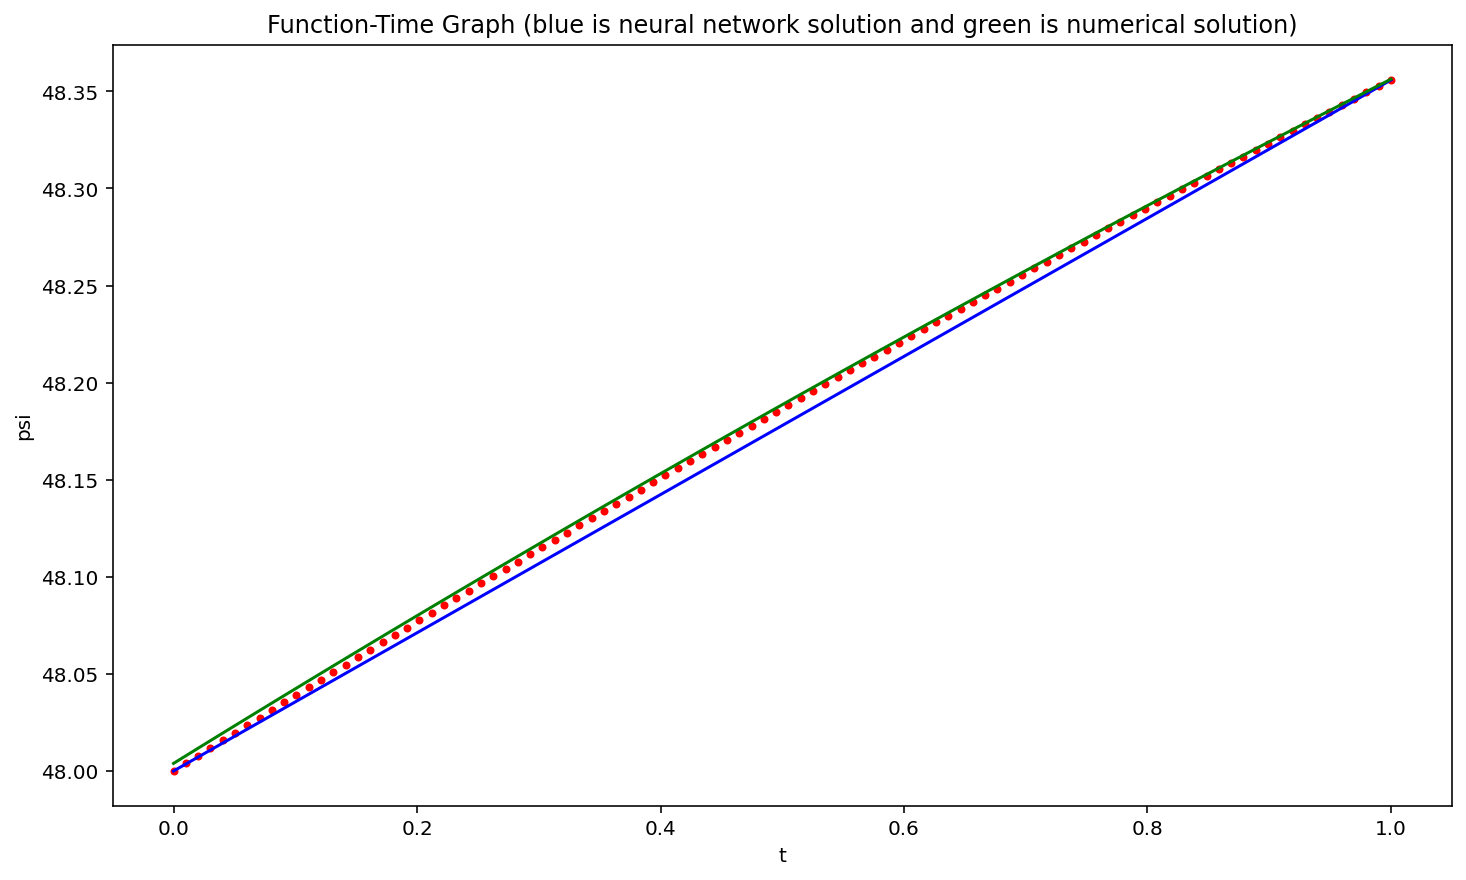

In [467]:
#plot to test results

num_p = 100 #Number of points in interval

t = np.linspace(0,1,num_p) #add points in the interval to test solution

psi = [] #holds function approximation
dpsi = [] #contains function derivative approximation


for t_i in t:
    neural_net_value = N(w0,w1,b0,b1,t_i).tolist()[0][0] #calculate point in neural network
    dneural_net_value = dN(w0,w1,b0,b1,t_i).tolist()[0][0] #calculate point in neural network derivative
    psi.append(t_i*neural_net_value+func0) #calculate and add the point in function approximation
    dpsi.append(dneural_net_value*t_i+neural_net_value) #calculate and add the point in function derivative approximation


dx = 1/num_p
numerical_boi = Euler(f,0,func0,1,dx)[0] #find numerical solution 

#plot graph
plt.title("Function-Time Graph (blue is neural network solution and green is numerical solution)")
plt.xlabel("t")
plt.ylabel("psi")

plt.scatter(t,func(t,func0),marker = ".", color = 'r')
plt.plot(t,psi,'b')
plt.plot(t,numerical_boi,'g')